**Enccoding**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('cleaned_processed_final.csv')

In [2]:
rename_mapping = {
    'Timestamp': 'Timestamp',
    'Usia': 'age',
    'JK': 'gender',
    'Sekolah': 'school',
    'Kelas': 'grade_level',
    'Jumlah uang bulanan': 'monthly_allowance',
    'Total pengeluaran dalam satu bulan': 'monthly_total_spending',
    'Seberapa besar pengaruh teman-teman Anda dalam pengambilan keputusan sehari-hari (contohnya dalam memilih pakaian, tempat nongkrong dan barang yang ingin dibeli)?': 'peer_influence_decision',
    'Seberapa besar rasa takut Anda merasa ditolak dalam pertemanan jika dianggap ketinggalan tren atau tidak mengikuti gaya teman-teman Anda?': 'fear_of_rejection',
    'Seberapa sering Anda membeli suatu barang karena diajak atau dipengaruhi oleh teman Anda, bukan karena kebutuhan pribadi?': 'peer_influenced_buying',
    'Dalam seminggu berapa kali Anda biasanya keluar untuk nongkrong  bersama teman?': 'hangout_freq',
    'Media sosial yang sering digunakan': 'social_media_used',
    'Lama rata-rata Anda menggunakan media sosial': 'social_media_duration',
    'Seberapa besar pengaruh rekomendasi influencer terhadap pilihan belanja atau gaya hidup Anda?': 'influencer_impact',
    'Dalam satu bulan, berapa kali Anda melakukan pembelian melalui platform belanja online seperti Shopee, Tokopedia dan Tiktok Shop?': 'online_shopping_freq',
    'Seberapa sering Anda makan atau membeli jajanan diluar rumah dalam seminggu?': 'eating_out_freq',
    'Seberapa sering Anda membeli barang dalam satu bulan (termasuk jajan, nongkrong, belanja dan kebutuhan lainnya)?': 'general_buying_freq',
    'Seberapa sering Anda membeli barang secara spontan tanpa perencanaan sebelumnya (impulsive buying)?': 'impulsive_buying_freq',
    'Saya merasa perlu membeli barang-barang yang sedang tren agar saya dapat diterima dalam kelompok pertemanan saya': 'need_trend_acceptance',
    'Sebagian besar uang saku saya habis karena kegiatan bersama teman, seperti nongkrong, makan diluar atau mengikuti tren lain?': 'money_spent_on_friends',
    'Saya sering merasa terdorong untuk mencoba tempat-tempat yang sedang tren di media sosial karena banyak teman saya yang melakukannya': 'driven_by_social_trends',
    'Saya rela mengurangi atau menghemat uang makan dan transportasi agar bisa membeli barang atau mengikuti tren yang sedang populer di sekolah': 'sacrifice_basic_needs_for_trends',
    'Frekuensi saya nongkrong di kafe atau tempat hangout tertentu meningkat karena sering diajak atau dipengaruhi oleh teman': 'hangout_increase_due_to_friends'
}
df = df.rename(columns=rename_mapping)

In [3]:
df['age'] = df['age'].fillna(df['age'].median())

In [4]:
map_freq = {
    'Tidak Pernah': 0, 'Tidak pernah': 0, '0 kali / Tidak pernah': 0, '0 kali /  Tidak pernah': 0,
    'Jarang': 1, 'Kadang-kadang': 2, 'Sering': 3, 'Sangat Sering': 4, 'Sangat sering': 4
}

map_agree = {
    'Sangat Tidak Setuju': 1, 'Tidak Setuju': 2, 'Netral': 3, 'Setuju': 4, 'Sangat Setuju': 5
}

map_influence = {
    'Tidak Sama Sekali': 0, 'Tidak sama sekali': 0,
    'Sedikit': 1, 'Cukup': 2, 'Banyak': 3, 'Sangat Banyak': 4, 'Sangat banyak': 4
}

map_fear = {
    'Tidak Takut Sama Sekali': 0, 'Tidak takut sama sekali': 0,
    'Sedikit takut': 1, 'Cukup takut': 2, 'Takut': 3, 'Sangat takut': 4
}

map_duration = {'< 1 jam per hari': 0, '1–2 jam per hari': 1, '3–4 jam per hari': 2, '5–6 jam per hari': 3, '> 6 jam per hari': 4}
map_hangout = {'0 kali / Tidak pernah': 0, '1-2 kali per minggu': 1, '3-4 kali per minggu': 2, '5-6 kali per minggu': 3, '7 kali atau lebih': 4}
map_online = {'0 kali /  Tidak pernah': 0, '1-2 kali per bulan': 1, '3-4 kali per bulan': 2, '5-6 kali per bulan': 3, '7 kali atau lebih': 4}

def clean_impulsive(val):
    if str(val) in ['0', 'Tidak Pernah']: return 0
    if str(val) == 'Jarang': return 1
    if str(val) in ['1-3', 'Kadang-kadang']: return 2
    if str(val) in ['4-6', 'Sering']: return 3
    if str(val) in ['7-9']: return 4
    if str(val) in ['>= 10', 'Sangat Sering']: return 5
    return 0

In [5]:
freq_cols = ['peer_influenced_buying', 'eating_out_freq', 'general_buying_freq']
for col in freq_cols:
    df[col + '_enc'] = df[col].map(map_freq)

agree_cols = ['need_trend_acceptance', 'money_spent_on_friends', 'driven_by_social_trends',
              'sacrifice_basic_needs_for_trends', 'hangout_increase_due_to_friends']
for col in agree_cols:
    df[col + '_enc'] = df[col].map(map_agree)

df['peer_influence_decision_enc'] = df['peer_influence_decision'].map(map_influence)
df['fear_of_rejection_enc'] = df['fear_of_rejection'].map(map_fear)
df['influencer_impact_enc'] = df['influencer_impact'].map(map_influence)
df['hangout_freq_enc'] = df['hangout_freq'].map(map_hangout)
df['social_media_duration_enc'] = df['social_media_duration'].map(map_duration)
df['online_shopping_freq_enc'] = df['online_shopping_freq'].map(map_online)
df['impulsive_buying_freq_enc'] = df['impulsive_buying_freq'].apply(clean_impulsive)

df['gender_enc'] = df['gender'].map({'Laki-laki': 0, 'Perempuan': 1})

status_map = {'Hemat': 0, 'Wajar': 1, 'Boros': 2, 'Defisit (Nombok)': 3}
df['Status_Keuangan_enc'] = df['Status_Keuangan'].map(status_map)

In [6]:
fomo_feature_cols = [
    'fear_of_rejection_enc',
    'need_trend_acceptance_enc',
    'driven_by_social_trends_enc',
    'peer_influence_decision_enc'
]

In [7]:
df['fomo_score'] = df[fomo_feature_cols].mean(axis=1)

In [8]:
feature_cols = [
    'age', 'gender_enc', 'monthly_allowance',
    'peer_influenced_buying_enc', 'eating_out_freq_enc', 'general_buying_freq_enc',
    'need_trend_acceptance_enc', 'money_spent_on_friends_enc', 'driven_by_social_trends_enc',
    'sacrifice_basic_needs_for_trends_enc', 'hangout_increase_due_to_friends_enc',
    'peer_influence_decision_enc', 'fear_of_rejection_enc', 'influencer_impact_enc',
    'hangout_freq_enc', 'social_media_duration_enc', 'online_shopping_freq_enc',
    'impulsive_buying_freq_enc',
    'fomo_score'  # <-- TAMBAHKAN FITUR BARU INI
]
df_model = df.dropna(subset=feature_cols + ['Status_Keuangan_enc', 'monthly_total_spending'])

Membuat Model Klasifikasi ( Random Forest )

In [9]:
X = df_model[feature_cols]
y = df_model['Status_Keuangan_enc']

In [10]:
# Bagi Data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan Latih Model Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_clf.predict(X_test)

Evaluasi Hasil

In [12]:
target_names = ['Hemat', 'Wajar', 'Boros', 'Defisit']
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       Hemat       0.67      0.11      0.19        18
       Wajar       0.33      0.25      0.29        48
       Boros       0.41      0.55      0.47        71
     Defisit       0.31      0.33      0.32        46

    accuracy                           0.37       183
   macro avg       0.43      0.31      0.32       183
weighted avg       0.39      0.37      0.36       183



In [13]:
importances = rf_clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)


C:\Users\noelt\AppData\Local\Temp\ipykernel_45032\1675533101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


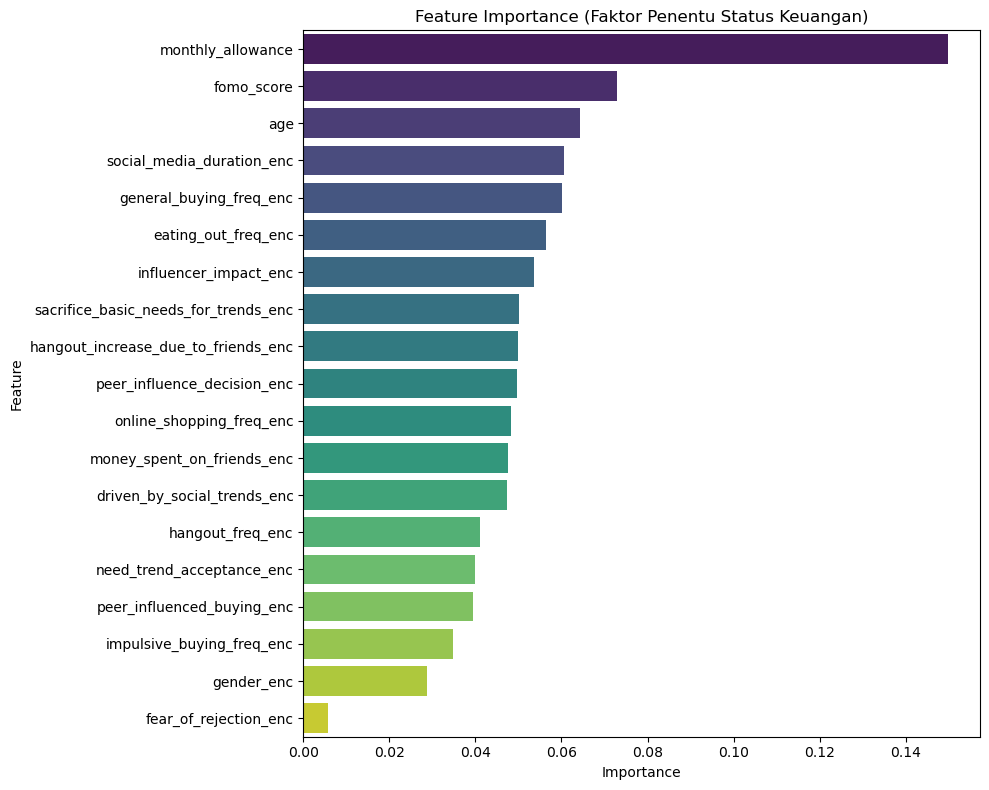

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance (Faktor Penentu Status Keuangan)')
plt.tight_layout()
plt.show()

In [15]:
print("Feature Importance (dengan FOMO Score):")
print(feature_imp_df)

Feature Importance (dengan FOMO Score):
                                 Feature  Importance
2                      monthly_allowance    0.149807
18                            fomo_score    0.073012
0                                    age    0.064407
15             social_media_duration_enc    0.060650
5                general_buying_freq_enc    0.060035
4                    eating_out_freq_enc    0.056345
13                 influencer_impact_enc    0.053653
9   sacrifice_basic_needs_for_trends_enc    0.050042
10   hangout_increase_due_to_friends_enc    0.049860
11           peer_influence_decision_enc    0.049627
16              online_shopping_freq_enc    0.048290
7             money_spent_on_friends_enc    0.047511
8            driven_by_social_trends_enc    0.047365
14                      hangout_freq_enc    0.041101
6              need_trend_acceptance_enc    0.039797
3             peer_influenced_buying_enc    0.039418
17             impulsive_buying_freq_enc    0.034664
1     

Model Linear Regression ( Prediksi )

In [16]:
target_reg = 'monthly_total_spending'

In [17]:
features_reg = feature_cols

In [18]:
df_reg = df.dropna(subset=features_reg + [target_reg])

X_reg = df_reg[features_reg]
y_reg = df_reg[target_reg]

In [19]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [21]:
y_pred_reg = lr_model.predict(X_test_reg)

r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("=== HASIL EVALUASI LINEAR REGRESSION ===")
print(f"R-Squared (Seberapa baik model menjelaskan data): {r2:.4f}")
print(f"MAE (Rata-rata prediksi meleset sebesar): Rp {mae:,.0f}")
print(f"RMSE (Tingkat kesalahan kuadratik): Rp {rmse:,.0f}")

=== HASIL EVALUASI LINEAR REGRESSION ===
R-Squared (Seberapa baik model menjelaskan data): 0.2864
MAE (Rata-rata prediksi meleset sebesar): Rp 126,513
RMSE (Tingkat kesalahan kuadratik): Rp 309,856


C:\Users\noelt\AppData\Local\Temp\ipykernel_45032\726834768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


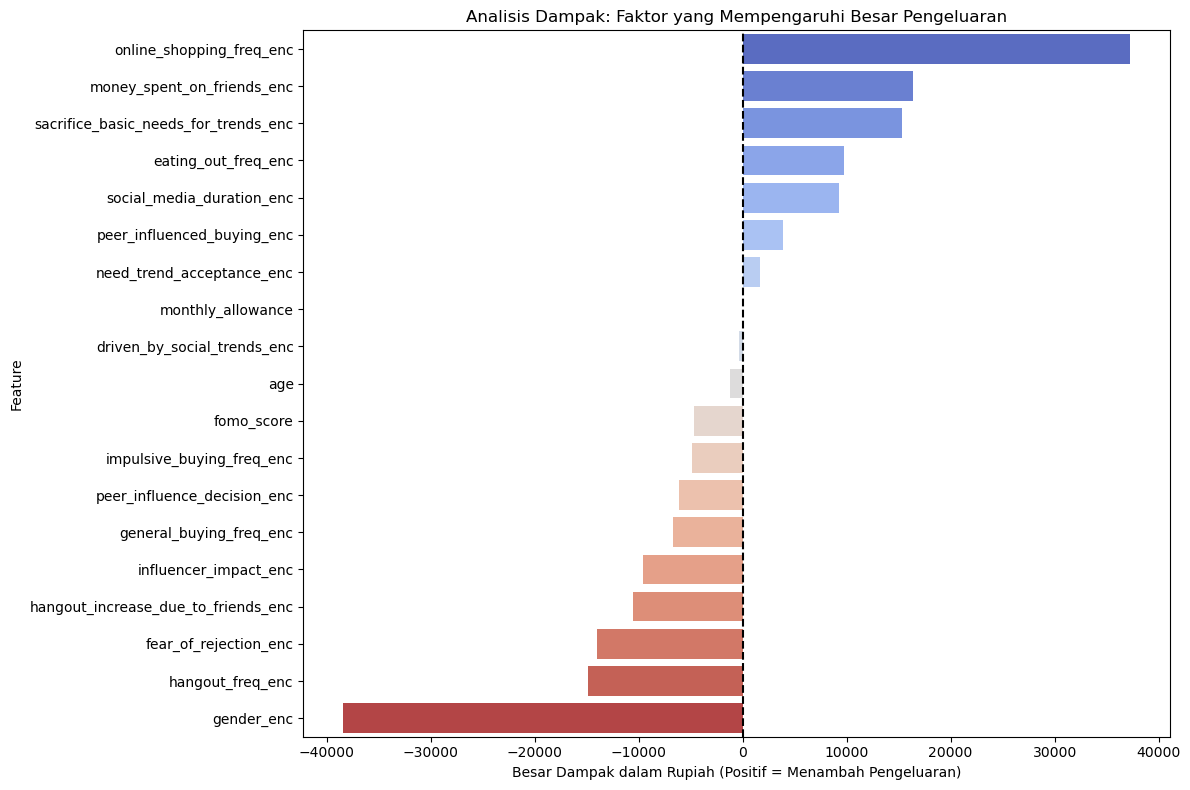

In [22]:
coef_df = pd.DataFrame({'Feature': features_reg, 'Coefficient': lr_model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Analisis Dampak: Faktor yang Mempengaruhi Besar Pengeluaran')
plt.xlabel('Besar Dampak dalam Rupiah (Positif = Menambah Pengeluaran)')
plt.axvline(x=0, color='black', linestyle='--') # Garis tengah nol
plt.tight_layout()
plt.show()

In [23]:
print("\nTop 5 Faktor Pendorong Pengeluaran Tinggi:")
print(coef_df.head(5))


Top 5 Faktor Pendorong Pengeluaran Tinggi:
                                 Feature   Coefficient
16              online_shopping_freq_enc  37284.014221
7             money_spent_on_friends_enc  16418.095795
9   sacrifice_basic_needs_for_trends_enc  15292.902301
4                    eating_out_freq_enc   9785.900594
15             social_media_duration_enc   9246.890728


Prediksi menggunakan random forest regresor

In [24]:
target_impulsive = 'impulsive_buying_freq_enc'

In [25]:
features_imp = [col for col in feature_cols if col != 'impulsive_buying_freq_enc']

In [26]:
df_imp = df.dropna(subset=features_imp + [target_impulsive])
X_imp = df_imp[features_imp]
y_imp = df_imp[target_impulsive]

In [27]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_imp_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_imp_model.fit(X_train_imp, y_train_imp)

RandomForestRegressor(random_state=42)

In [29]:
y_pred_imp = rf_imp_model.predict(X_test_imp)

mae_imp = mean_absolute_error(y_test_imp, y_pred_imp)
r2_imp = r2_score(y_test_imp, y_pred_imp)

print(f"\n=== EVALUASI MODEL PREDIKSI IMPULSIVE BUYING ===")
print(f"R-Squared: {r2_imp:.4f}")
print(f"MAE (Rata-rata kesalahan prediksi skala 0-5): {mae_imp:.2f} poin")


=== EVALUASI MODEL PREDIKSI IMPULSIVE BUYING ===
R-Squared: -0.0489
MAE (Rata-rata kesalahan prediksi skala 0-5): 0.50 poin


C:\Users\noelt\AppData\Local\Temp\ipykernel_45032\2134710069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df2, palette='magma')


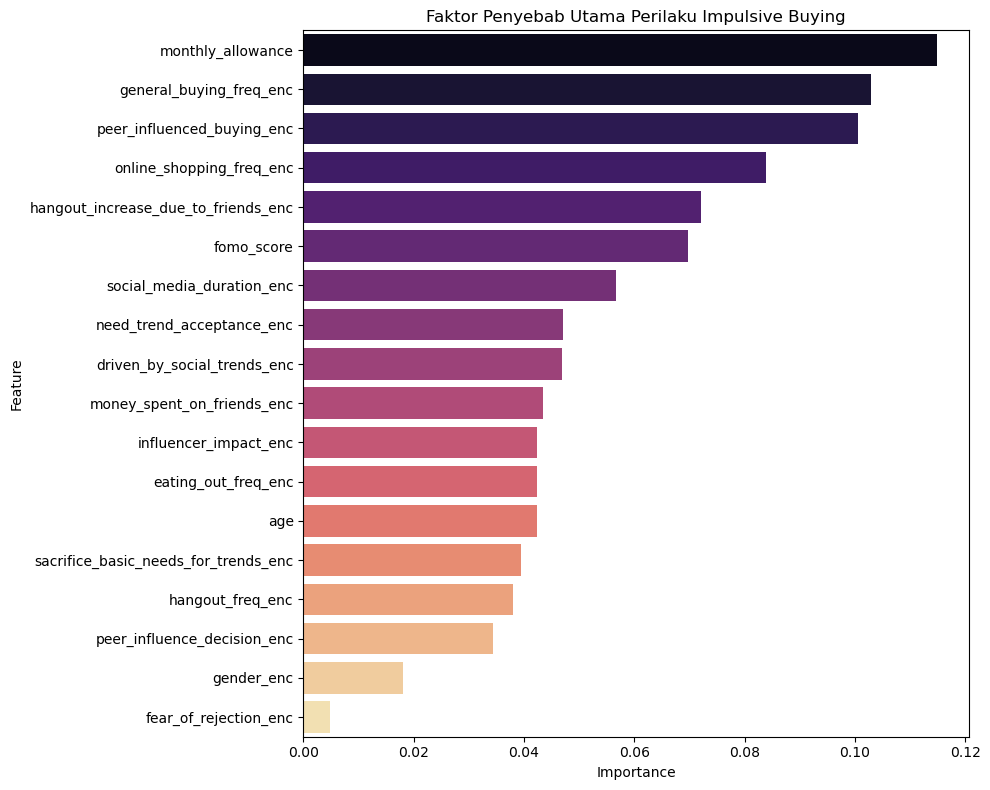

In [30]:
importances_imp = rf_imp_model.feature_importances_
feature_imp_df2 = pd.DataFrame({'Feature': features_imp, 'Importance': importances_imp})
feature_imp_df2 = feature_imp_df2.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df2, palette='magma')
plt.title('Faktor Penyebab Utama Perilaku Impulsive Buying')
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
cluster_features = [
    'monthly_allowance',          # Kemampuan finansial
    'monthly_total_spending',     # Realisasi pengeluaran
    'peer_influence_decision_enc',# Tingkat pengaruh teman
    'fear_of_rejection_enc',      # Faktor psikologis
    'peer_influenced_buying_enc', # Perilaku belanja sosial
    'hangout_freq_enc',           # Gaya hidup nongkrong
    'social_media_duration_enc',  # Gaya hidup digital
    'online_shopping_freq_enc',   # Kebiasaan belanja online
    'impulsive_buying_freq_enc',  # Kebiasaan impulsif
    'eating_out_freq_enc'         # Kebiasaan jajan
]

In [33]:
df_cluster = df.dropna(subset=cluster_features).copy()
X_cluster = df_cluster[cluster_features]

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [35]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\noelt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\noelt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\noelt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\noelt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

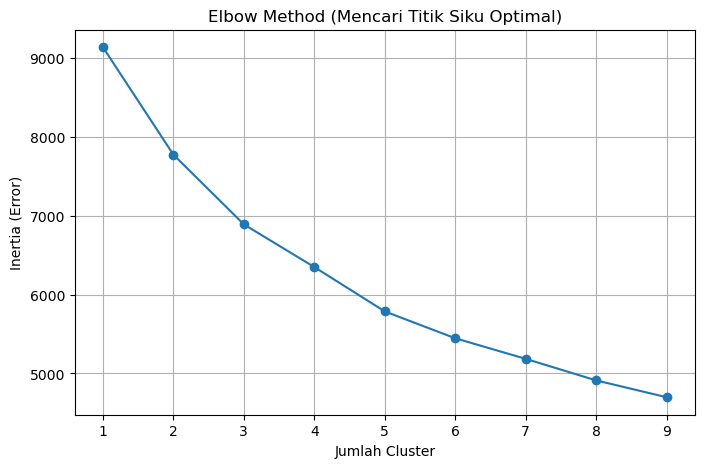

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method (Mencari Titik Siku Optimal)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia (Error)')
plt.grid(True)
plt.show()

In [37]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster['Cluster_Label'] = kmeans.fit_predict(X_scaled)

c:\Users\noelt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


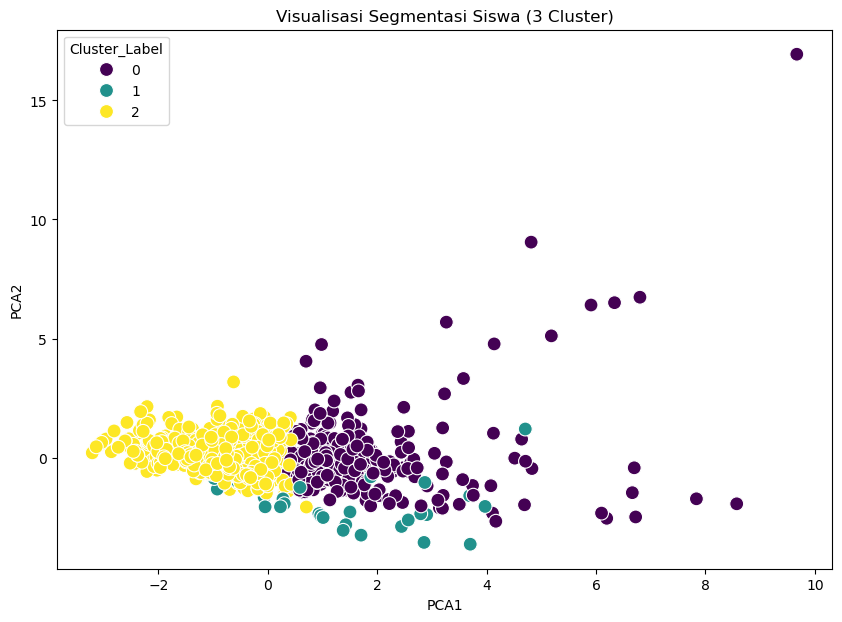

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Label', data=df_cluster, palette='viridis', s=100)
plt.title(f'Visualisasi Segmentasi Siswa (3 Cluster)')
plt.show()

In [39]:
cluster_summary = df_cluster.groupby('Cluster_Label')[cluster_features].mean()

# Format tampilan angka agar mudah dibaca
pd.options.display.float_format = '{:,.2f}'.format
print("Rata-rata Perilaku per Cluster:")
print(cluster_summary.T) # Transpose agar mudah dibaca vertikal

print("\nJumlah Siswa per Cluster:")
print(df_cluster['Cluster_Label'].value_counts())

Rata-rata Perilaku per Cluster:
Cluster_Label                        0          1          2
monthly_allowance           403,554.28 290,428.59 203,514.51
monthly_total_spending      405,130.83 244,914.30 190,484.32
peer_influence_decision_enc       1.76       2.06       0.98
fear_of_rejection_enc             0.00       3.00       0.00
peer_influenced_buying_enc        1.42       1.71       0.71
hangout_freq_enc                  1.00       0.66       0.54
social_media_duration_enc         2.19       1.91       1.37
online_shopping_freq_enc          1.50       0.86       0.75
impulsive_buying_freq_enc         0.99       0.71       0.39
eating_out_freq_enc               2.60       2.03       1.47

Jumlah Siswa per Cluster:
Cluster_Label
2    621
0    258
1     35
Name: count, dtype: int64


In [40]:
import joblib
import os
import json

folder_path = 'models'
os.makedirs(folder_path, exist_ok=True)

print(f"Folder '{folder_path}' siap digunakan.\n")


# 1. Simpan Random Forest Classifier (Klasifikasi Status Keuangan)
if 'rf_clf' in globals():
    path = os.path.join(folder_path, 'model_klasifikasi_status_keuangan.joblib')
    joblib.dump(rf_clf, path)
    print(f"✅ Tersimpan: {path}")
else:
    print("❌ Skip: rf_clf tidak ditemukan (pastikan code klasifikasi sudah dijalankan).")

# 2. Simpan Linear Regression (Prediksi Nominal Pengeluaran)
if 'lr_model' in globals():
    path = os.path.join(folder_path, 'model_regresi_pengeluaran.joblib')
    joblib.dump(lr_model, path)
    print(f"✅ Tersimpan: {path}")
else:
    print("❌ Skip: lr_model tidak ditemukan.")

# 3. Simpan Random Forest Regressor (Prediksi Impulsive Buying)
if 'rf_imp_model' in globals():
    path = os.path.join(folder_path, 'model_regresi_impulsive.joblib')
    joblib.dump(rf_imp_model, path)
    print(f"✅ Tersimpan: {path}")
else:
    print("❌ Skip: rf_imp_model tidak ditemukan.")

# 4. Simpan K-Means Clustering & Scaler
if 'kmeans' in globals():
    path_kmeans = os.path.join(folder_path, 'model_kmeans_clustering.joblib')
    joblib.dump(kmeans, path_kmeans)
    print(f"✅ Tersimpan: {path_kmeans}")

    # PENTING: Simpan Scaler juga! (K-Means butuh data yang discale sama persis)
    if 'scaler' in globals():
        path_scaler = os.path.join(folder_path, 'scaler_untuk_clustering.joblib')
        joblib.dump(scaler, path_scaler)
        print(f"✅ Tersimpan: {path_scaler}")
else:
    print("❌ Skip: Model K-Means tidak ditemukan.")


mapping_data = {
    'map_freq': map_freq,
    'map_agree': map_agree,
    'map_influence': map_influence,
    'map_fear': map_fear,
    'map_duration': map_duration,
    'map_hangout': map_hangout,
    'map_online': map_online,
    'status_map': status_map
}

json_path = os.path.join(folder_path, 'encoding_mappings.json')
with open(json_path, 'w') as f:
    json.dump(mapping_data, f)
print(f"✅ Tersimpan: {json_path} (Kamus Encoding)")

print("\n🎉 Selesai! Semua file model ada di dalam folder 'models'.")

Folder 'models' siap digunakan.

✅ Tersimpan: models\model_klasifikasi_status_keuangan.joblib
✅ Tersimpan: models\model_regresi_pengeluaran.joblib
✅ Tersimpan: models\model_regresi_impulsive.joblib
✅ Tersimpan: models\model_kmeans_clustering.joblib
✅ Tersimpan: models\scaler_untuk_clustering.joblib
✅ Tersimpan: models\encoding_mappings.json (Kamus Encoding)

🎉 Selesai! Semua file model ada di dalam folder 'models'.
